# Import the necessary libraries 

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
#https://geojson.xyz/
# Define the list of coastal states
w_coast = ['Arizona', 'California', 'Idaho',
           'Montana', 'Nevada', 'New Mexico',
           'Oregon', 'Utah', 'Washington', 'Wyoming']

# Load the GeoJSON file
url = 'https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson'
df = gpd.read_file(url)

# Filter the DataFrame to include only coastal states and select columns
df = df[df.name.isin(w_coast)][['name','geometry']]   #select columns

# Reproject geometries to a projected CRS (e.g., EPSG:3857)
df = df.to_crs('EPSG:3857')

# Calculate centroids
df['centroid'] = df.centroid  

# Extract longitude and latitude
df['lon'] = [i.xy[0][0] for i in df.centroid]        
df['lat'] = [i.xy[1][0] for i in df.centroid]         
df.head()

name                                           geometry  \
1     Montana  POLYGON ((-12378080.523 5552697.095, -12388918...   
4       Idaho  POLYGON ((-12361999.146 5541300.005, -12362056...   
5  Washington  POLYGON ((-13024165.874 5833417.950, -13013975...   
6     Arizona  POLYGON ((-12138858.896 4439094.580, -12138686...   
7  California  POLYGON ((-12729929.314 4091367.372, -12708897...   

                            centroid           lon           lat  
1  POINT (-12207797.775 5956345.924) -1.220780e+07  5.956346e+06  
4  POINT (-12766050.772 5538968.009) -1.276605e+07  5.538968e+06  
5  POINT (-13402336.087 6007999.556) -1.340234e+07  6.008000e+06  
6  POINT (-12430078.547 4074320.507) -1.243008e+07  4.074321e+06  
7  POINT (-13326005.299 4493440.166) -1.332601e+07  4.493440e+06

# Using the contextily library to make the chart look realistic. Add Basemap

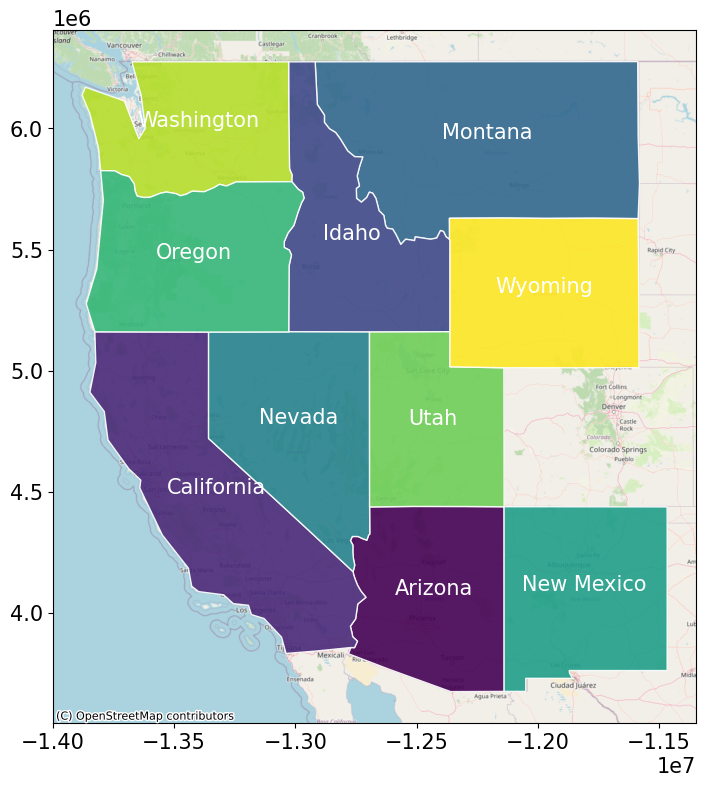

In [7]:
# Import the contextily library
import contextily
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(figsize=(18, 9))

#plotting geometry data
df.plot(column ='name', alpha=0.9, legend=False,      
        edgecolor = 'white', cmap='viridis', ax=ax)
df.apply(lambda x: ax.annotate(text = x['name'],      #annotations
                               xy = x.geometry.centroid.coords[0],
                               color = 'white',
                               ha = 'center'), axis = 1)

#Using OpenStreetMap.Mapnik to visualize the map
ax = contextily.add_basemap(ax, crs=df.crs.to_string(), source=contextily.providers.OpenStreetMap.Mapnik)
plt.show()

# Using this with U.S. states and territories by income information on Wikipedia

In [8]:
#Read the html file from wikipedia
df_w= pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income', 
                    match='States and territories ranked by median household income') 
df_w= df_w[0].rename(columns={'States and Washington, D.C.':'name'})
df_w= df_w.iloc[:,1:-1]
df_w.head()


name     2021     2019     2018     2017     2016     2015  \
0     United States  $69,717  $65,712  $63,179  $60,336  $57,617  $55,775   
1  Washington, D.C.  $90,088  $92,266  $85,203  $82,372  $75,506  $75,628   
2          Maryland  $90,203  $86,738  $83,242  $80,776  $78,945  $75,847   
3     Massachusetts  $89,645  $85,843  $79,835  $77,385  $75,297  $70,628   
4        New Jersey  $89,296  $85,751  $81,740  $80,088  $76,126  $72,222   

      2014     2013     2012     2011     2010  
0  $53,657  $52,250  $51,371  $50,502  $50,046  
1  $71,648  $67,572  $66,583  $63,124  $60,903  
2  $73,971  $72,483  $71,122  $70,004  $68,854  
3  $69,160  $66,768  $65,339  $62,859  $62,072  
4  $71,919  $70,165  $69,667  $67,458  $67,681

# Merge Operation

In [9]:
# Do a Merge Operation of df and df_w
df_m = pd.merge(df, df_w, on='name')
df_m.head()

name                                           geometry  \
0     Montana  POLYGON ((-12378080.523 5552697.095, -12388918...   
1       Idaho  POLYGON ((-12361999.146 5541300.005, -12362056...   
2  Washington  POLYGON ((-13024165.874 5833417.950, -13013975...   
3     Arizona  POLYGON ((-12138858.896 4439094.580, -12138686...   
4  California  POLYGON ((-12729929.314 4091367.372, -12708897...   

                            centroid           lon           lat     2021  \
0  POINT (-12207797.775 5956345.924) -1.220780e+07  5.956346e+06  $63,249   
1  POINT (-12766050.772 5538968.009) -1.276605e+07  5.538968e+06  $66,474   
2  POINT (-13402336.087 6007999.556) -1.340234e+07  6.008000e+06  $84,247   
3  POINT (-12430078.547 4074320.507) -1.243008e+07  4.074321e+06  $69,056   
4  POINT (-13326005.299 4493440.166) -1.332601e+07  4.493440e+06  $84,907   

      2019     2018     2017     2016     2015     2014     2013     2012  \
0  $57,153  $55,328  $53,386  $50,027  $49,509  $46,328  $46,972  $45,076   
1  $60,999  $55,583  $52,225  $51,807  $48,275  $47,861  $46,783  $45,489   
2  $78,687  $74,073  $70,979  $67,106  $64,129  $61,366  $58,405  $57,573   
3  $62,055  $59,246  $56,581  $53,558  $51,492  $50,068  $48,510  $47,826   
4  $80,440  $75,277  $71,805  $67,739  $64,500  $61,933  $60,190  $58,328   

      2011     2010  
0  $44,222  $42,666  
1  $43,341  $43,490  
2  $56,835  $55,631  
3  $46,709  $46,789  
4  $57,287  $57,708

# Convert Household Income from string to Integers

In [17]:
#Remove the year 2020
y_list = [str(i) for i in list(range(2010,2022))]
y_list.remove('2020')

# Convert Household Income from string to Integers
for i in y_list:
    df_m[str(i)+'_v'] = df_m[i].apply(lambda x: int(str(x).replace('$','').replace(',','')))
df_m.head()

name                                           geometry  \
0     Montana  POLYGON ((-12378080.523 5552697.095, -12388918...   
1       Idaho  POLYGON ((-12361999.146 5541300.005, -12362056...   
2  Washington  POLYGON ((-13024165.874 5833417.950, -13013975...   
3     Arizona  POLYGON ((-12138858.896 4439094.580, -12138686...   
4  California  POLYGON ((-12729929.314 4091367.372, -12708897...   

                            centroid           lon           lat     2021  \
0  POINT (-12207797.775 5956345.924) -1.220780e+07  5.956346e+06  $63,249   
1  POINT (-12766050.772 5538968.009) -1.276605e+07  5.538968e+06  $66,474   
2  POINT (-13402336.087 6007999.556) -1.340234e+07  6.008000e+06  $84,247   
3  POINT (-12430078.547 4074320.507) -1.243008e+07  4.074321e+06  $69,056   
4  POINT (-13326005.299 4493440.166) -1.332601e+07  4.493440e+06  $84,907   

      2019     2018     2017     2016  ... 2011_v 2012_v 2013_v 2014_v 2015_v  \
0  $57,153  $55,328  $53,386  $50,027  ...  44222  45076  46972  46328  49509   
1  $60,999  $55,583  $52,225  $51,807  ...  43341  45489  46783  47861  48275   
2  $78,687  $74,073  $70,979  $67,106  ...  56835  57573  58405  61366  64129   
3  $62,055  $59,246  $56,581  $53,558  ...  46709  47826  48510  50068  51492   
4  $80,440  $75,277  $71,805  $67,739  ...  57287  58328  60190  61933  64500   

  2016_v  2017_v  2018_v  2019_v  2021_v  
0  50027   53386   55328   57153   63249  
1  51807   52225   55583   60999   66474  
2  67106   70979   74073   78687   84247  
3  53558   56581   59246   62055   69056  
4  67739   71805   75277   80440   84907  

[5 rows x 27 columns]

# Visualization

# Using spatial areas and colors with Choropleth maps

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

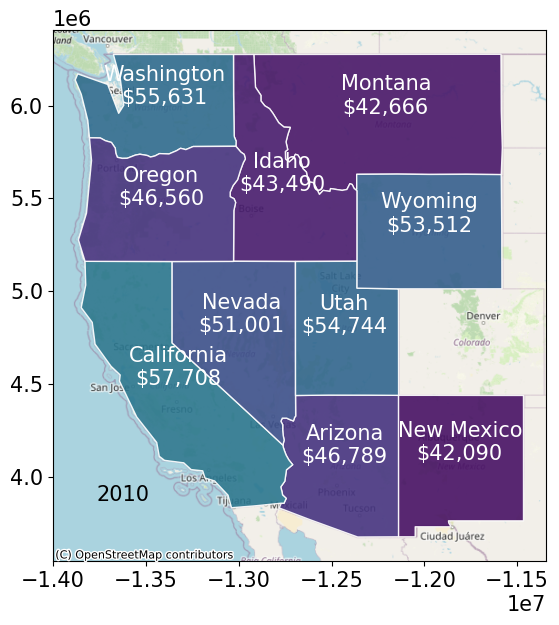

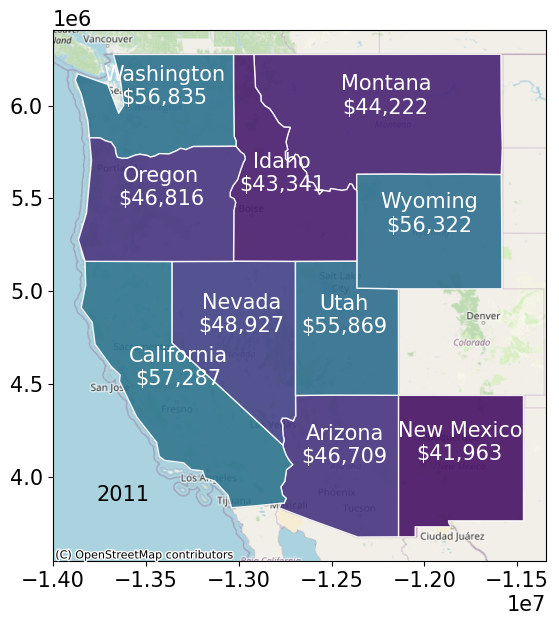

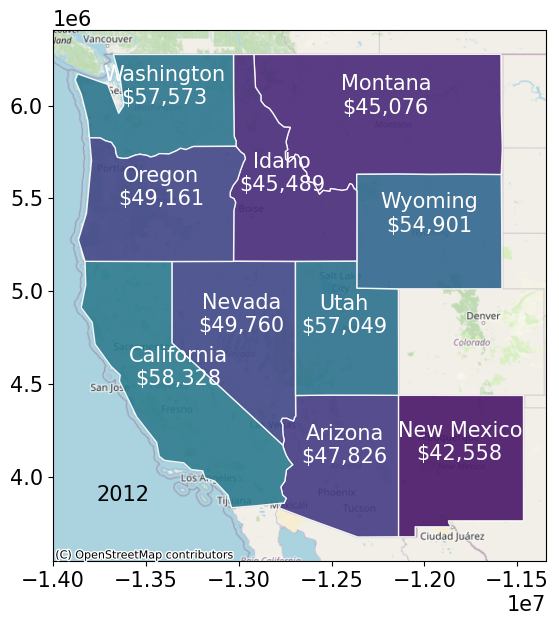

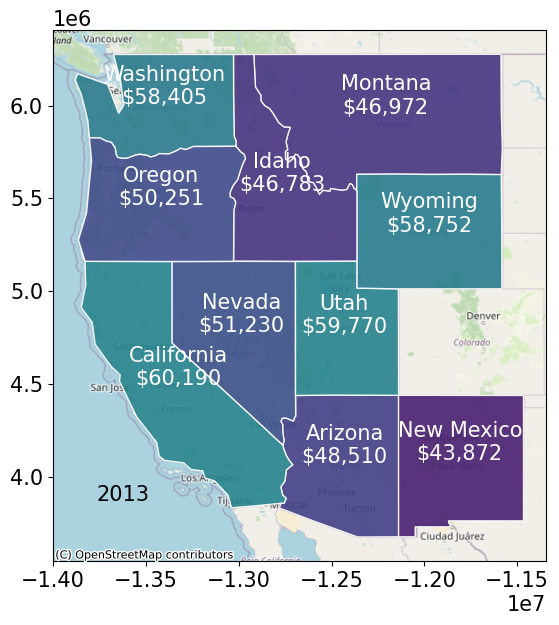

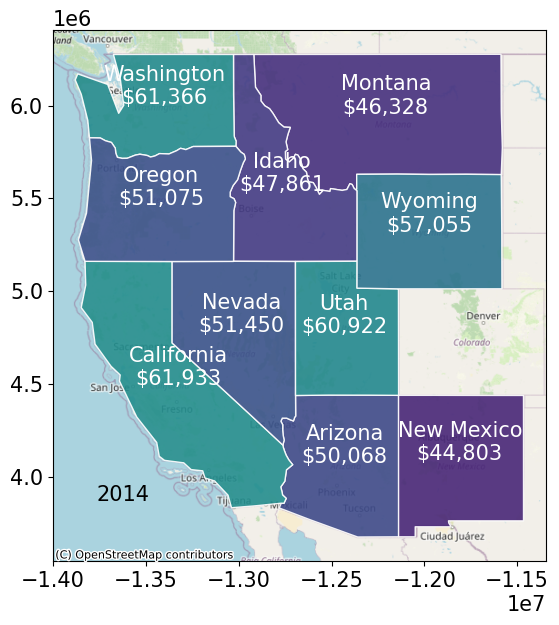

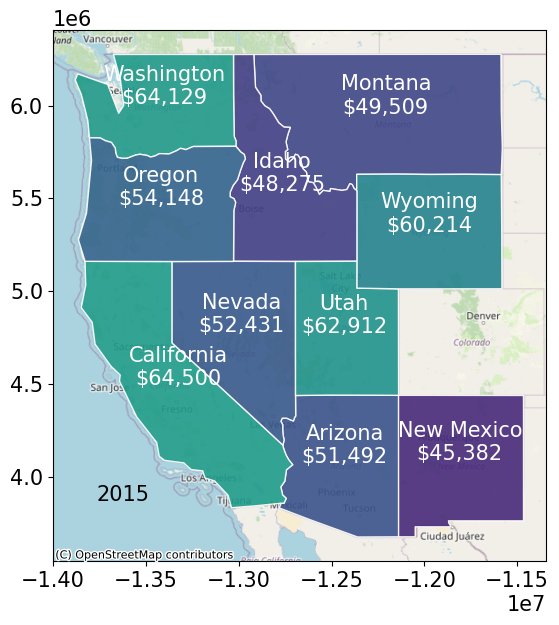

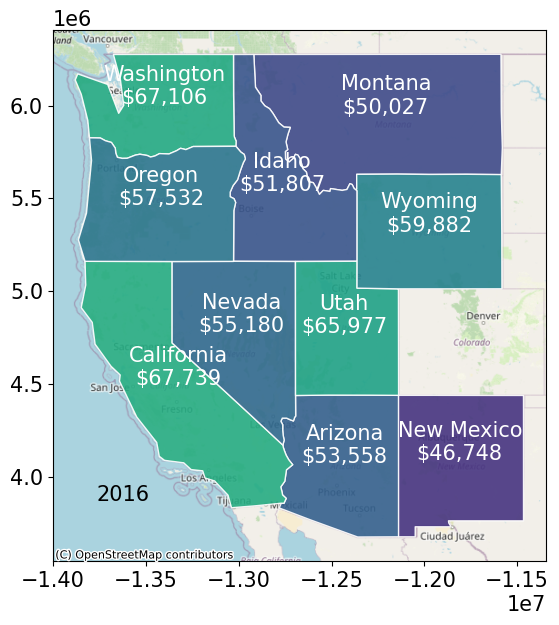

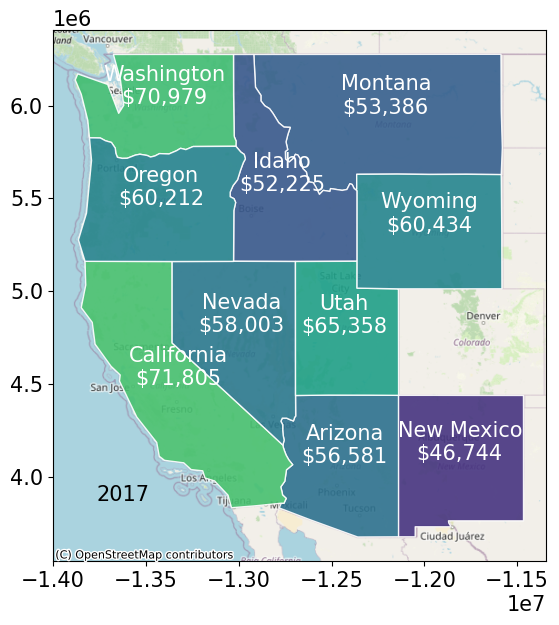

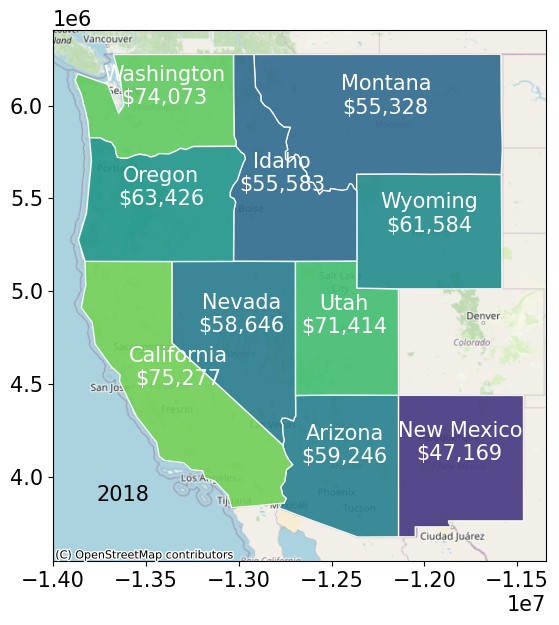

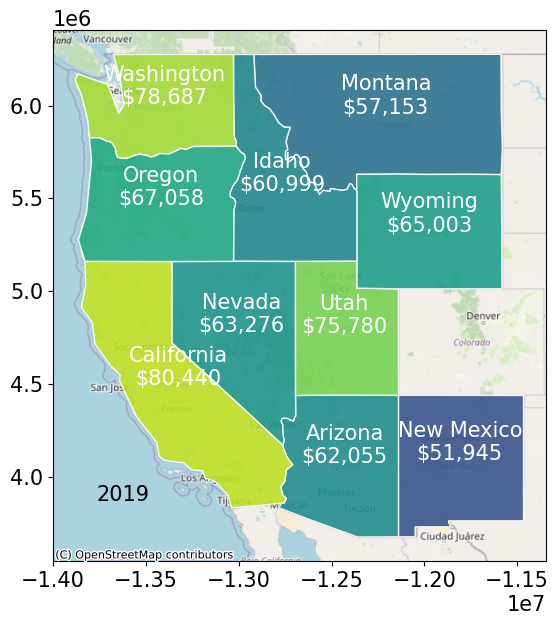

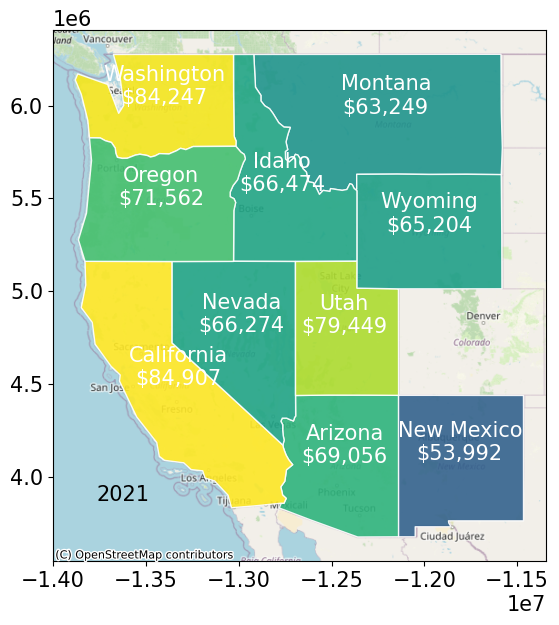

In [28]:
# Plot choropleth maps for each year and save
v_list = [i+'_v' for i in y_list]
for year,val in zip(y_list, v_list):
    ax = df_m.plot(column = val,                          #plotting choropleth maps
                   edgecolor = 'white',
                   vmin = 40000, vmax = 85000, alpha=0.9,
                   figsize = (9, 6.5), cmap='viridis',
                   legend=False)
    
    df_m.apply(lambda x: ax.annotate(text = x['name'] +'\n'+ x[year],    #annotaion
                                     color = 'white',
                                     xy = x.geometry.centroid.coords[0],
                                     ha = 'center'), axis = 1)
    ax = contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik, zoom=5) 
    plt.legend(title=year, frameon=False,
               bbox_to_anchor=(0.05, 0.05), loc='lower left')
    plt.tight_layout()
    plt.savefig(r'C:\Users\Owner\Desktop\GA_visualization_proj\choropleth_'+year+'.png')
   

#  Creating a photo collage - Using Matplotlib.pyplot

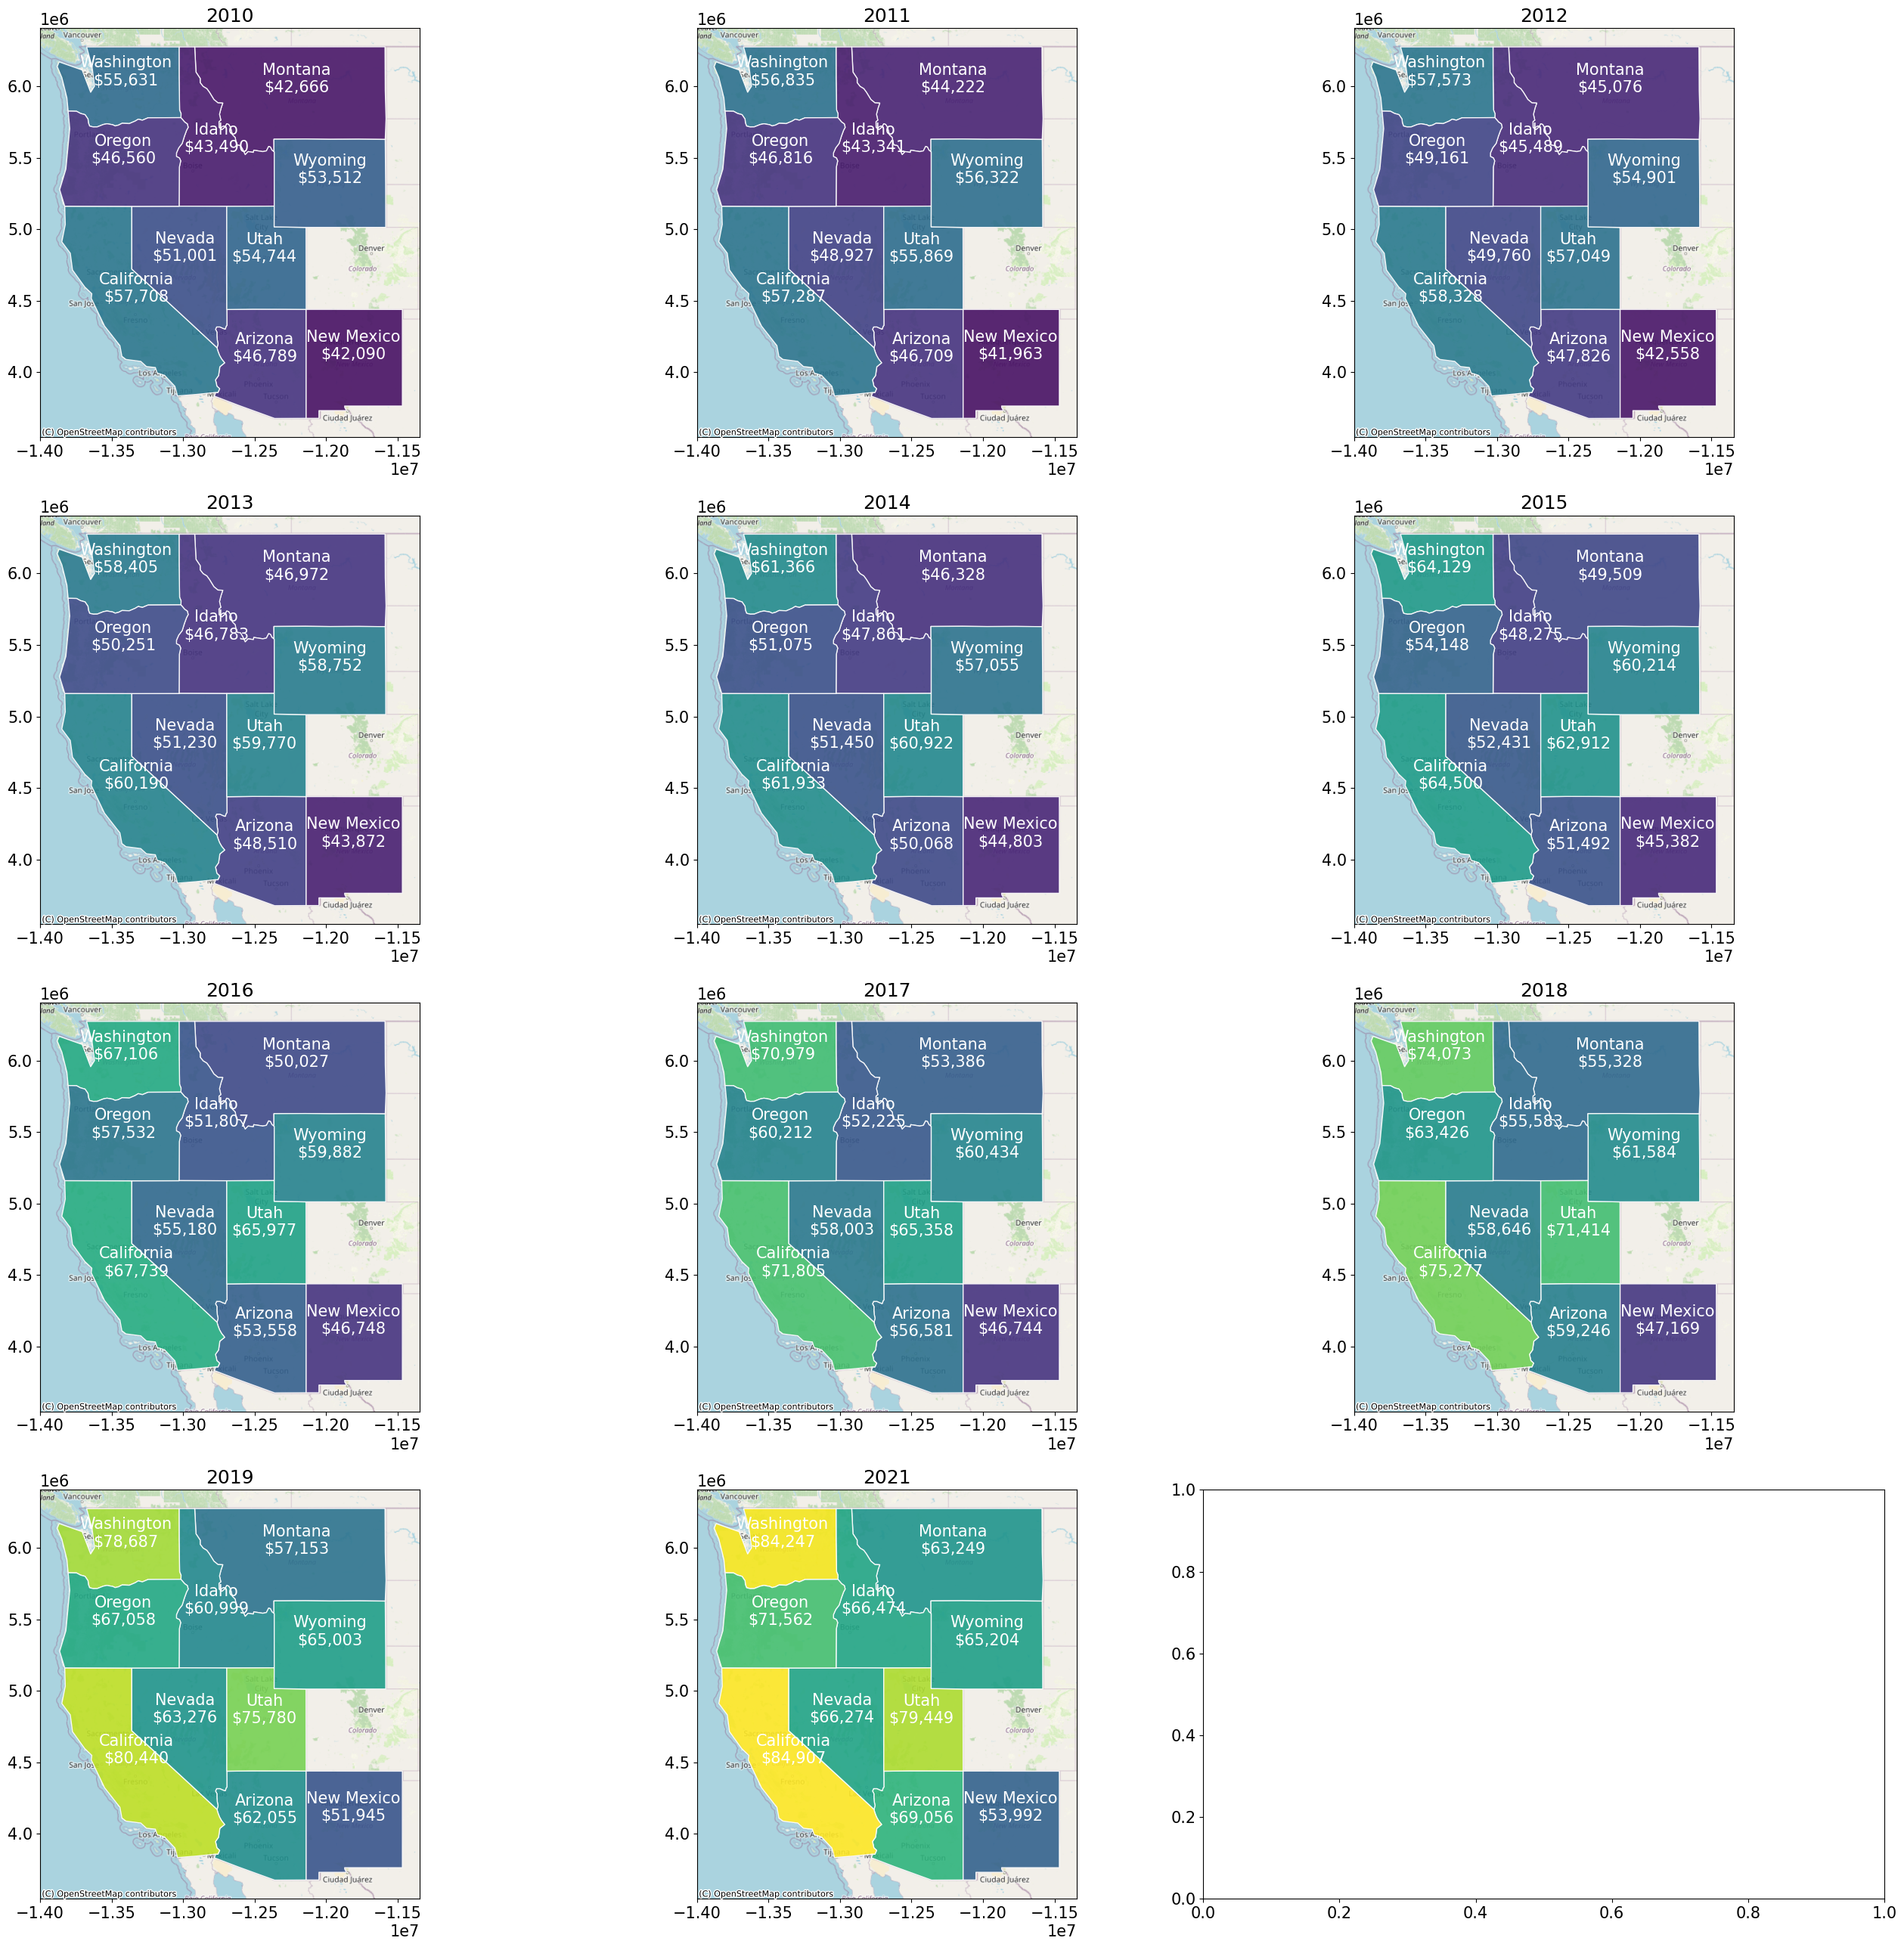

In [82]:
import matplotlib.pyplot as plt
import contextily

def get_collage(cols_n, rows_n, width, height, y_list, save_name):
    fig, axs = plt.subplots(rows_n, cols_n, figsize=(width/100, height/100))
    
    for i, year in enumerate(y_list):
        ax = axs[i // cols_n, i % cols_n]
        ax.set_title(year)
        df_m.plot(column=year+'_v', ax=ax, edgecolor='white', vmin=40000, vmax=85000, alpha=0.9, cmap='viridis', legend=False)
        df_m.apply(lambda x: ax.annotate(text=x['name'] + '\n' + str(x[year]), color='white', xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
        contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik, zoom=5) 
    
    plt.tight_layout()
    plt.savefig(save_name)

# output width = number of columns * figure width
# output height = number of rows * figure height
get_collage(3, 4, 900 * 3, 650 * 4, y_list, r'C:\Users\Owner\Desktop\GA_visualization_proj\choropleth_collage.png')


# Creating an animation

MovieWriter Pillow unavailable; using Pillow instead.


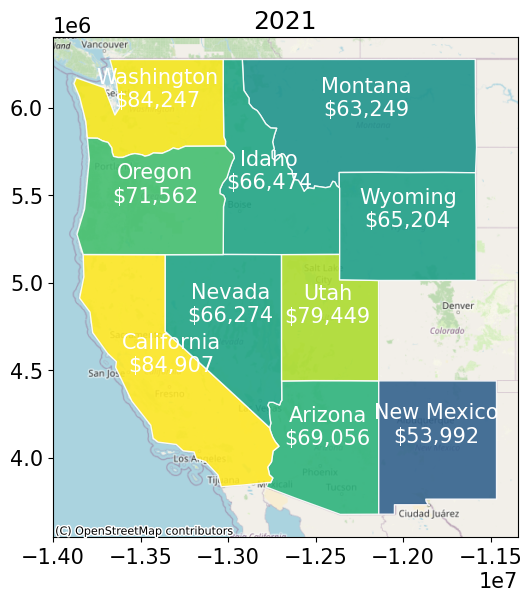

In [83]:
import matplotlib.pyplot as plt
import contextily
from matplotlib.animation import FuncAnimation

# Function to update the plot for each frame of the animation
def update_map(frame):
    ax.clear()  # Clear previous frame
    plot_map(ax, y_list[frame])  # Plot the map for the current frame
    ax.set_title(y_list[frame])  # Set title for the current frame

# Function to plot the map for a specific year
def plot_map(ax, year):
    #ax.set_xlim(-126.5, -102.4)
    #ax.set_ylim(30, 50)
    df_m.plot(column=year+'_v', ax=ax, edgecolor='white', vmin=40000, vmax=85000, alpha=0.9, cmap='viridis', legend=False)
    df_m.apply(lambda x: ax.annotate(text=x['name'] + '\n' + str(x[year]), color='white', xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
    contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik, zoom=5)

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(9, 6.5))

# Define the number of frames (equal to the number of years)
num_frames = len(y_list)

# Create the animation
ani = FuncAnimation(fig, update_map, frames=num_frames, interval=1000)

# Save the animation as a GIF
ani.save(r'C:\Users\Owner\Desktop\GA_visualization_proj\map_animation.gif', writer='Pillow')

plt.show()
#Open the downloaded GIF to see the wonders!

# Comparing sizes with Bubble charts

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

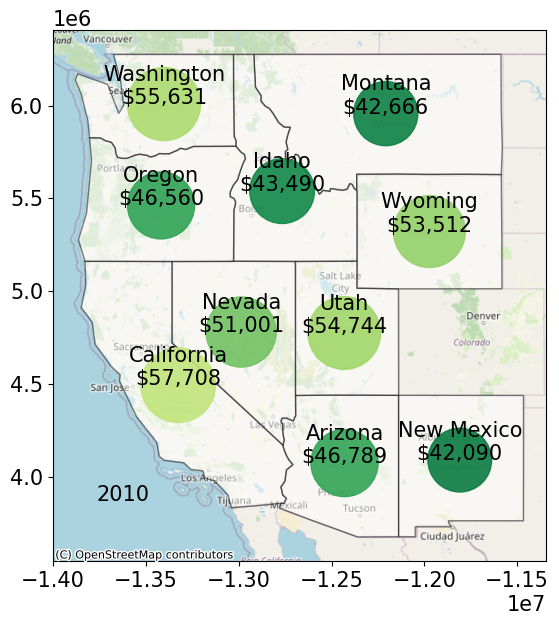

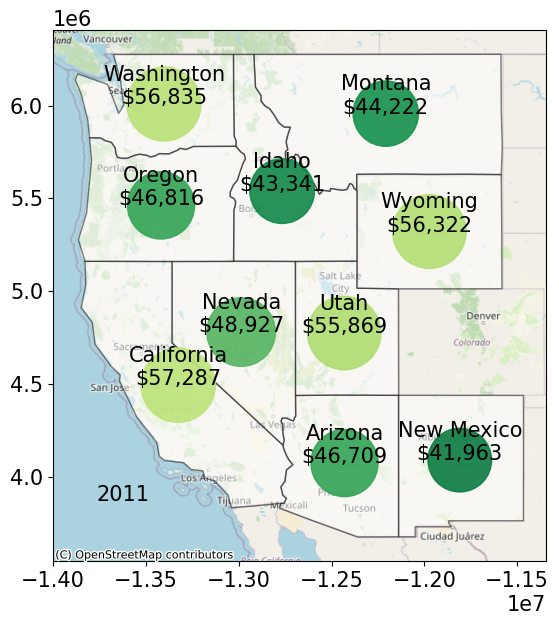

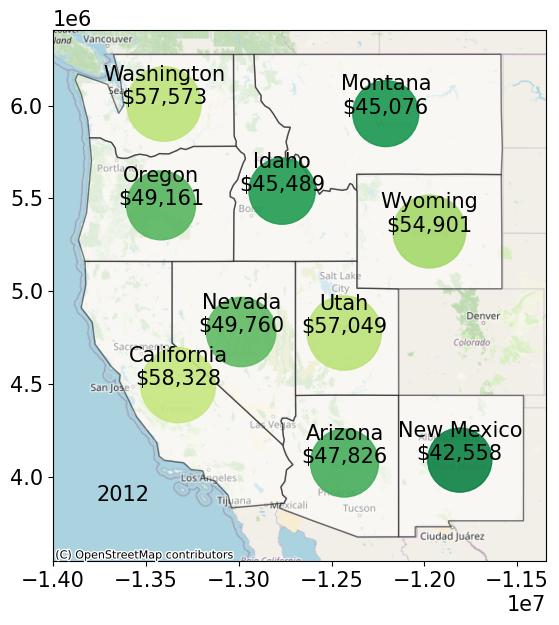

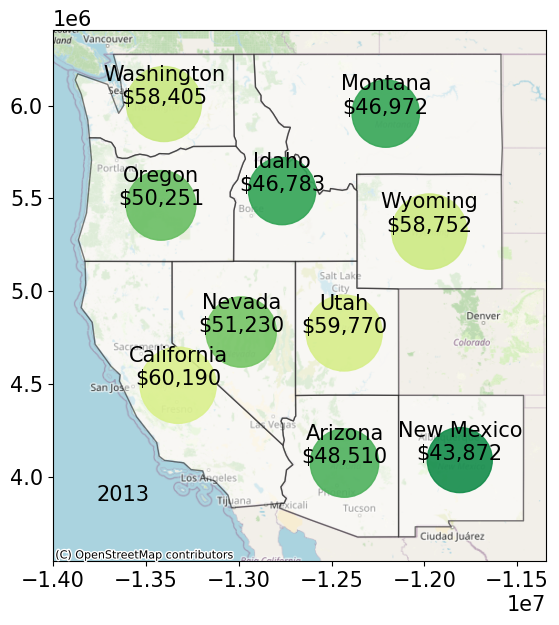

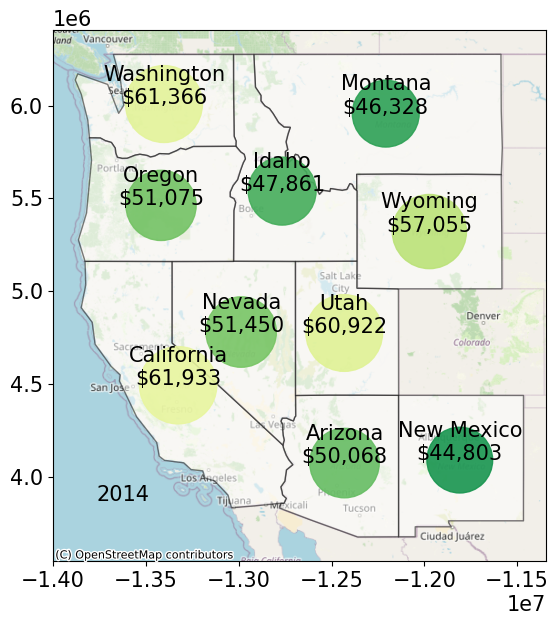

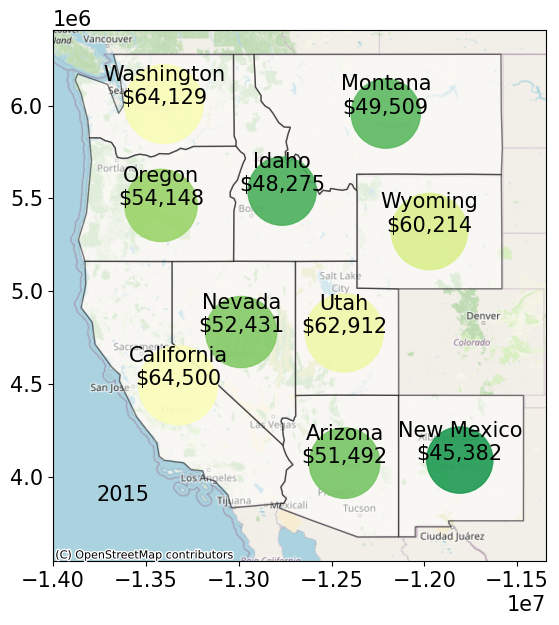

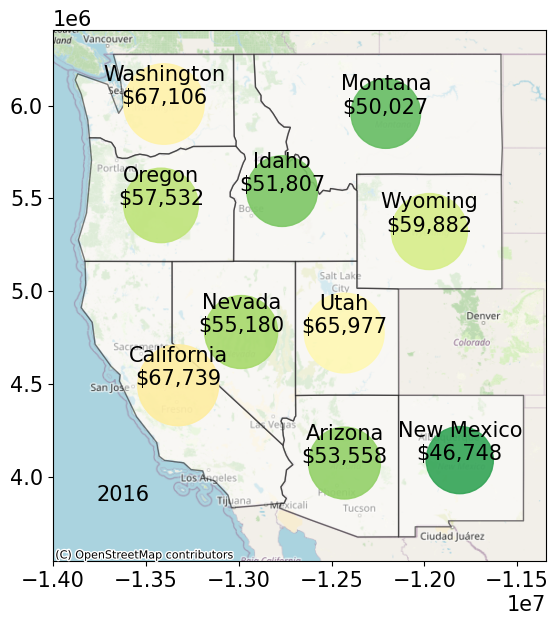

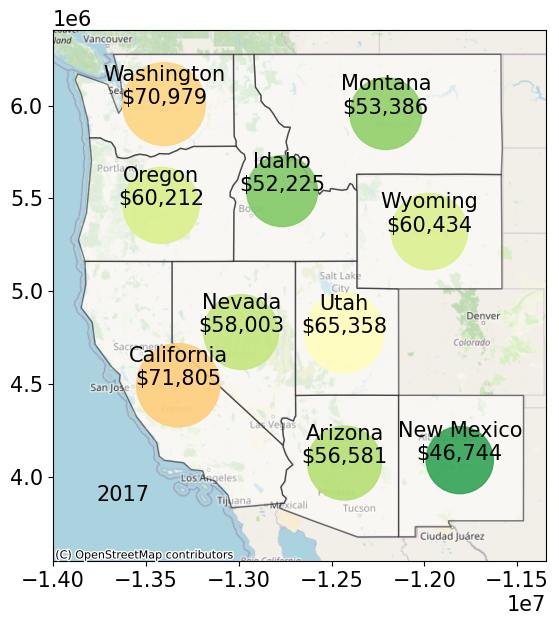

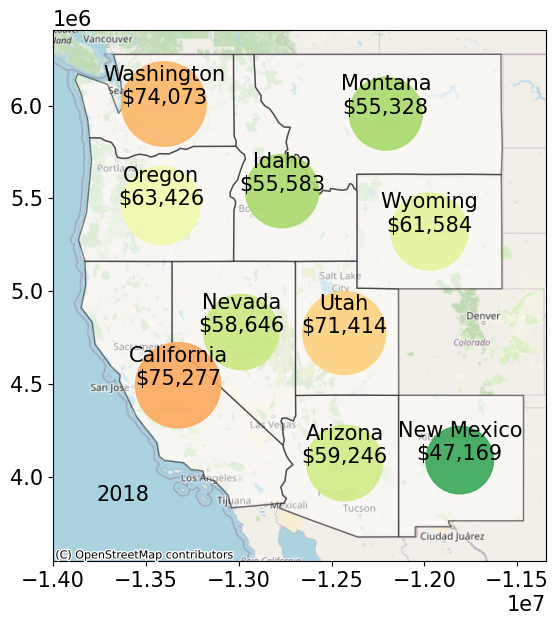

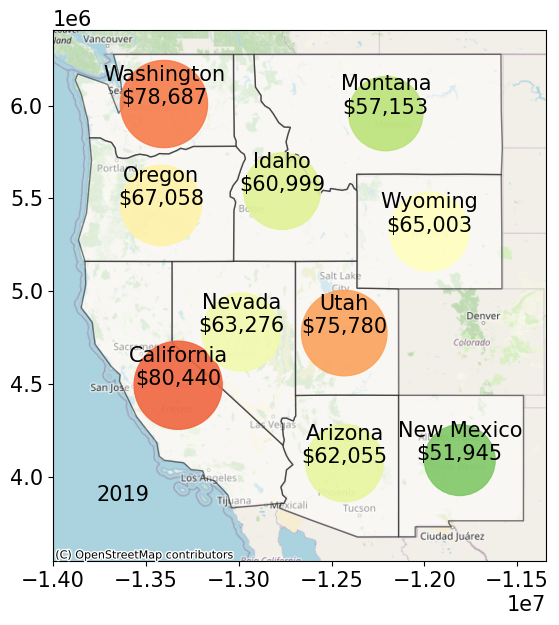

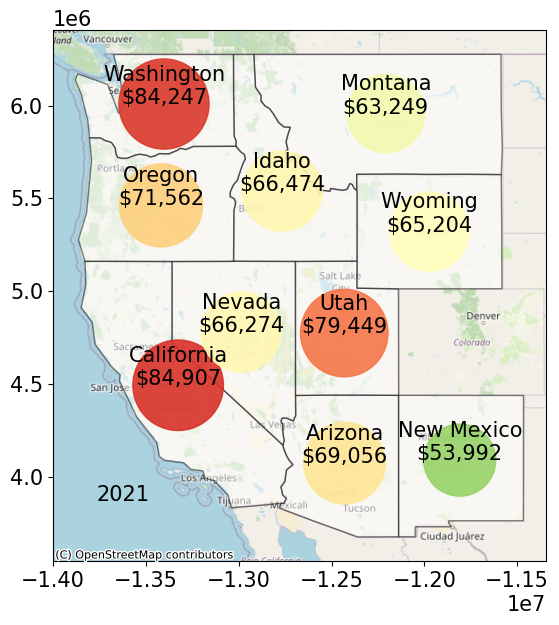

In [118]:
#extract color palette, the palette can be changed
import plotly.graph_objects as go
pal = list(sns.color_palette(palette='RdYlGn_r', n_colors=90000-40000).as_hex())
dict_pal = dict(zip(list(range(40000,90000)),pal))

for year, val in zip(y_list, v_list): 
    ax = df_m.plot(alpha=0.5, legend=False,  # Removed the 'column' parameter
                   edgecolor='black', color='white', figsize=(9, 6.5))

    n = 0.05  # adjust bubble size
    ax.scatter(df_m.geometry.centroid.x, df_m.geometry.centroid.y, s=df_m[val]*n,
               color=[dict_pal.get(i) for i in df_m[val]], alpha=0.9)

    df_m.apply(lambda x: ax.annotate(text=x['name'] + '\n' + str(x[year]),
                                     xy=x.geometry.centroid.coords[0],
                                     ha='center'), axis=1)
    
    ax = contextily.add_basemap(ax, source=contextily.providers.OpenStreetMap.Mapnik, zoom=5)

    plt.legend(title=year, frameon=False, bbox_to_anchor=(0.05, 0.05), loc='lower left')
    plt.tight_layout()
    plt.savefig(r'C:\Users\Owner\Desktop\GA_visualization_proj\bubble_'+year+'.png')
